In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### 1. Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required.

In [2]:
data=pd.read_csv('xAPI-Edu-Dataset.csv')
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [3]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [4]:
data.rename(columns = {'NationalITy':'Nationality'}, inplace = True)
data

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [5]:
data.isnull().sum()

gender                      0
Nationality                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

**there are no null values present in the data set**

In [6]:
data.dtypes

gender                      object
Nationality                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

**there are 4 int  feature variable and rest other all are obejct**

### 2. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

In [7]:
data.columns

Index(['gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

<Axes: xlabel='Semester', ylabel='count'>

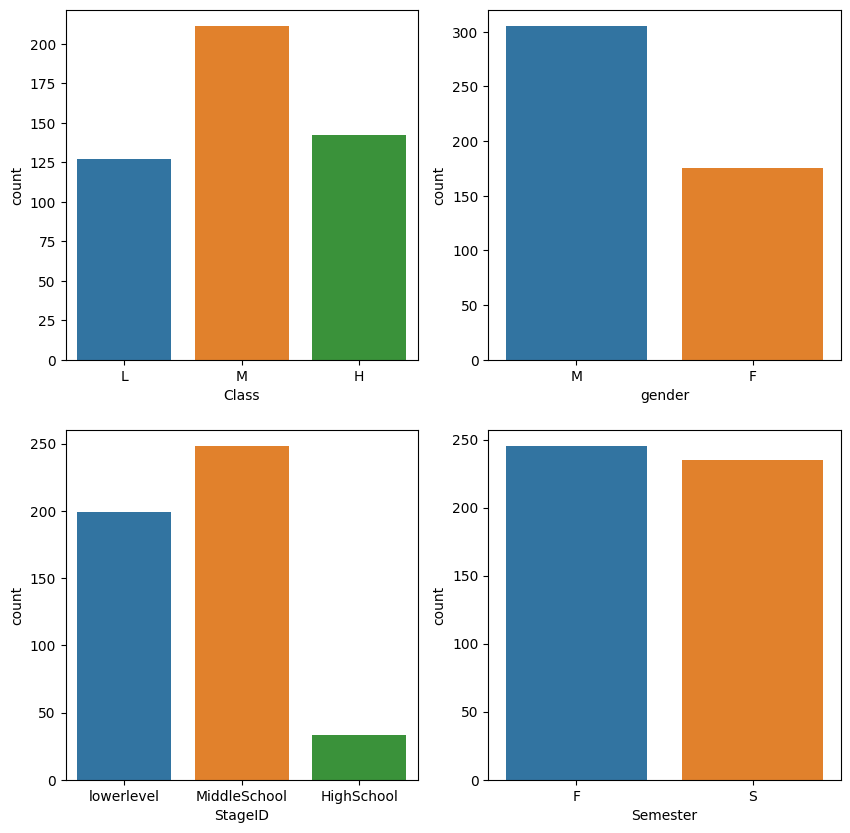

In [8]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

**in class graph we can observe that middile class has high as compared to H class and H class are high as compared to low**

<Axes: xlabel='Nationality', ylabel='count'>

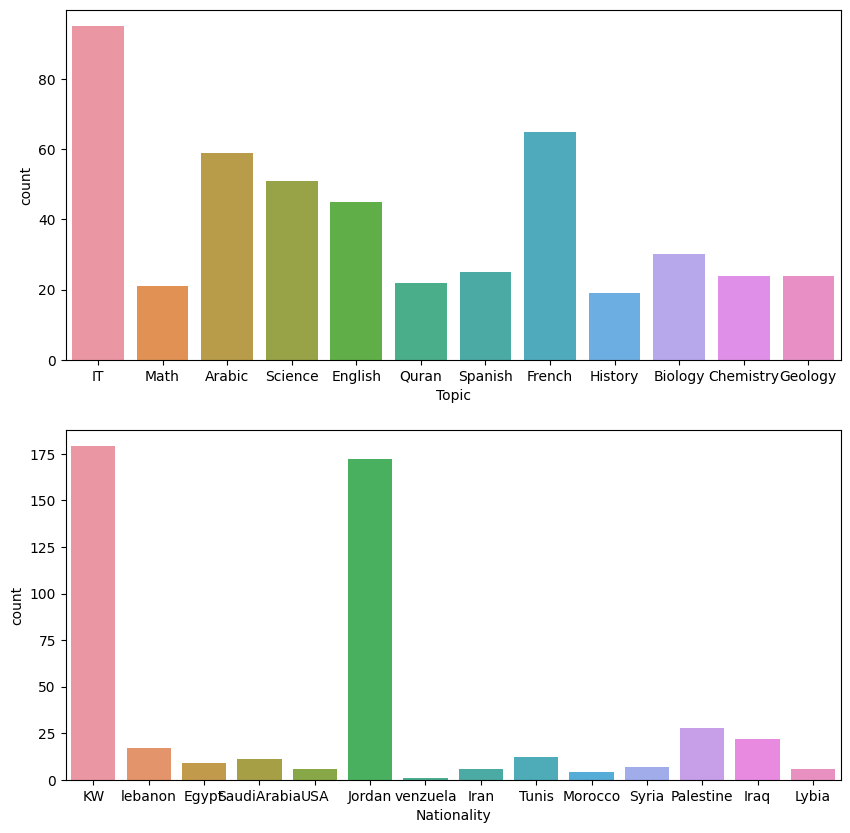

In [9]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='Nationality', data=data, ax=axis2)

### 3. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<Axes: xlabel='Nationality', ylabel='count'>

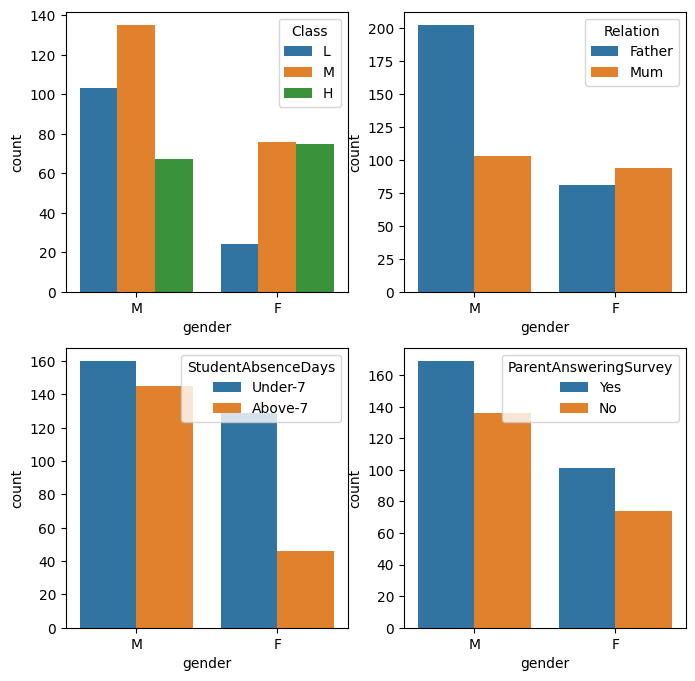

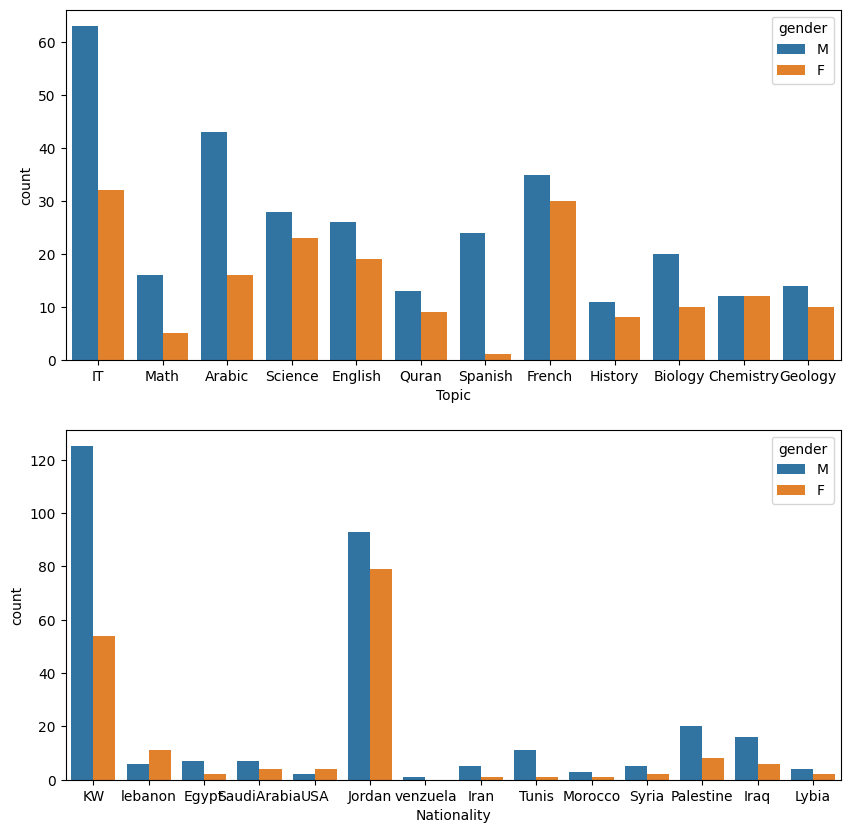

In [10]:
fig, axarr  = plt.subplots(2,2,figsize=(8,8))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M','F'])
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1)
sns.countplot(x='Nationality', hue='gender', data=data, ax=axis2)


**1.in parentsurvey male gives more answers as compared to female**

**2.Girls as better attendancce  then boys**

**3.in nationality graph we can observe that in jordan there are 90% male, 80% female and KW country has maximum male as compared as compared to other country,And Venzuela has minimum male ,no feamle gender in this country** 

### 4. Visualize categorical variables with numerical variables and give 



<Axes: xlabel='Class', ylabel='Discussion'>

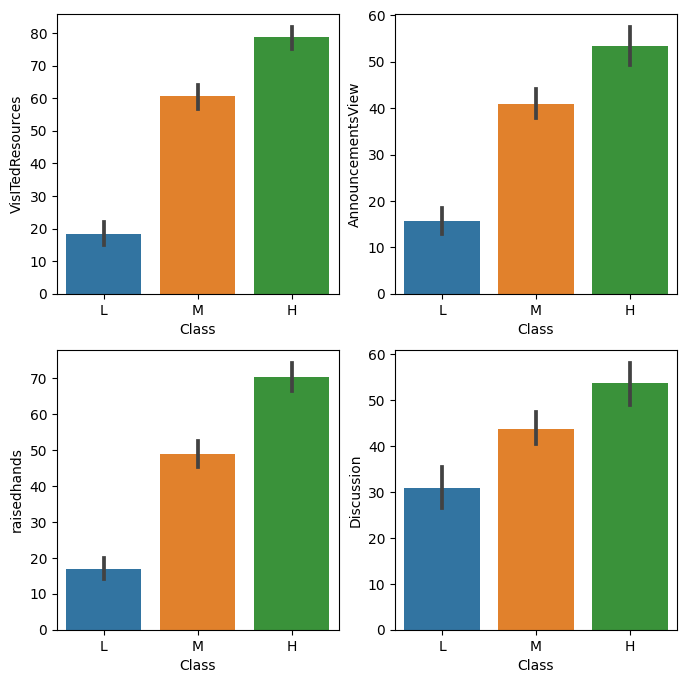

In [11]:
fig, axarr  = plt.subplots(2,2,figsize=(8,8))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

**higher counts in Discussion, raisedhands, AnnouncementViews, RaisedHands**


In [12]:
ave_raisedhands = sum(data['raisedhands'])/len(data['raisedhands'])
ave_VisITedResources = sum(data['VisITedResources'])/len(data['VisITedResources'])
ave_AnnouncementsView = sum(data['AnnouncementsView'])/len(data['AnnouncementsView'])
unsuccess = data.loc[(data['raisedhands'] >= ave_raisedhands) & (data['VisITedResources']>=ave_VisITedResources) & (data['AnnouncementsView']>=ave_AnnouncementsView)  & (data['Class'] == 'L')]

In [13]:
unsuccess

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


### 5. From the above result, what are the factors that leads to get low grades of the students?

In [14]:
data['numeric_class'] = [1 if data.loc[i,'Class'] == 'L' else 2 if data.loc[i,'Class'] == 'M' else 3 for i in range(len(data))]


In [15]:
grade_male_ave = sum(data[data.gender == 'M'].numeric_class)/float(len(data[data.gender == 'M']))
grade_female_ave = sum(data[data.gender == 'F'].numeric_class)/float(len(data[data.gender == 'F']))


Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

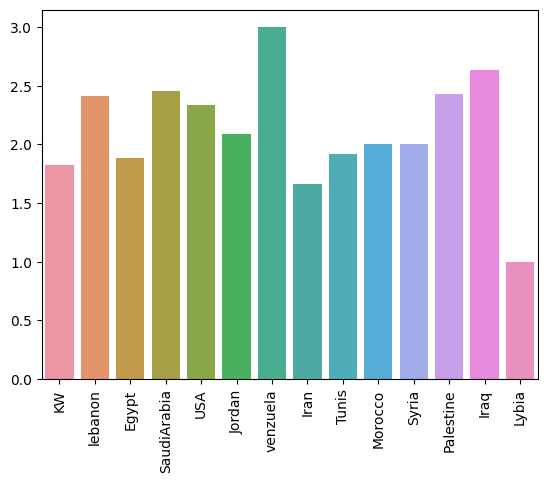

In [16]:
# Now lets look at nationality
nation = data.Nationality.unique()
nation_grades_ave = [sum(data[data.Nationality == i].numeric_class)/float(len(data[data.Nationality == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(data[data.Nationality == 'Jordan'].numeric_class)/float(len(data[data.Nationality == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

**Venzuela has high average of 3.0 and jordan has 2.3 average that impact on these both  students equally**

### 6. Build classification model using Logistic Regression and present it's confusion matrix and classification report.


In [17]:
data1 = data.drop('Class',axis = 1)
data_with_dummies = pd.get_dummies(data1, drop_first=True)

In [18]:
data_with_dummies.head() ## drop class column and then check the data table


,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,Nationality_Iran,Nationality_Iraq,Nationality_Jordan,Nationality_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
1,20,20,3,25,2,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
2,10,7,0,30,1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,30,25,5,35,1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,40,50,12,50,2,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [19]:
Features = data_with_dummies.drop(['numeric_class'],axis = 1)
Target = data_with_dummies['numeric_class']

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)

StandardScaler()

In [21]:
X = scaler.fit_transform(Features)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=50)


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [26]:
y_pred = Logit_Model.predict(X_test)
#y_pred_prob= Logit_Model.predict_proba(X_test)[:,1]
cfm=confusion_matrix(y_test,y_pred)
Score = accuracy_score(y_test,y_pred)
Report = classification_report(y_test,y_pred)
y_pred


array([3, 1, 2, 2, 2, 1, 3, 3, 2, 2, 3, 3, 1, 1, 2, 3, 2, 2, 2, 3, 1, 1,
       1, 2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 1, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 1, 1, 2, 3, 2, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3,
       2, 1, 3, 2, 1, 3, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 2, 1, 2, 2, 1, 1, 3, 2, 3, 1, 3, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 1, 1, 2, 2, 1, 3, 1,
       2, 3, 3, 2, 1, 1, 1, 3, 1, 3, 1, 2], dtype=int64)

In [27]:
Score

0.75

In [28]:
print(Report)

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        46
           2       0.69      0.71      0.70        59
           3       0.74      0.74      0.74        39

    accuracy                           0.75       144
   macro avg       0.76      0.75      0.76       144
weighted avg       0.75      0.75      0.75       144



In [29]:
Target.value_counts()

numeric_class
2    211
3    142
1    127
Name: count, dtype: int64

**After this our f1 SCore is 82 we can make this more better for these we can use other tecniques like RFE,variance threshold**

### 7. Justify the model. Tune the model using various techniques, if need be.

In [30]:
from sklearn.feature_selection import RFE  ## we use RFE tecnique
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=None, step=1, verbose=0,
                              importance_getter='auto')
rfe = rfe.fit(Features, Target)

In [31]:
selected_features=Features.columns[rfe.support_]
X_rfe = Features[selected_features]

In [32]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_rfe,Target, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_rfe = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_rfe.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)

[[25 14  0]
 [10 53  7]
 [ 1 12 22]]
              precision    recall  f1-score   support

           1       0.69      0.64      0.67        39
           2       0.67      0.76      0.71        70
           3       0.76      0.63      0.69        35

    accuracy                           0.69       144
   macro avg       0.71      0.68      0.69       144
weighted avg       0.70      0.69      0.69       144



**after using the RFE our model F1 Score is 67 which is poor as compared to standrdscaller to do it better we use another tecq. Variance threshold**

In [33]:
from sklearn.feature_selection import VarianceThreshold   ### using another tecnique Variance tHreshold
import numpy as np 

var = VarianceThreshold(threshold=0.025)
X_trans = var.fit_transform(Features)

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_trans,Target, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_var_thresh = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_var_thresh.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)

[[31  8  0]
 [ 5 53 12]
 [ 0  8 27]]
              precision    recall  f1-score   support

           1       0.86      0.79      0.83        39
           2       0.77      0.76      0.76        70
           3       0.69      0.77      0.73        35

    accuracy                           0.77       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.77      0.77      0.77       144



**After complete the Variance threshold our f1 score will be 83% which explain our model is good worked** 